## **Dataset**
    
https://archive.ics.uci.edu/ml/datasets/iris

### **Descrição retirada da página oficial do dataset**

Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
* Iris Setosa
* Iris Versicolour
* Iris Virginica


## **1. Bibliotecas Requeridas**

In [8]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [9]:
prefix_path = '/home/lucas/'

In [10]:
# Definição das colunas do DataFrame
columns = ['sepal_length', 'sepal_width', 'petal_length',
           'petal_width', 'class']

In [11]:
# Criação do DataFrame
df = pd.read_csv(prefix_path + 'Documentos/Desafios/via_varejo/model/dataset/iris.data', 
                 names=columns, sep=',')

In [12]:
df.shape

(150, 5)

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
# Verificando a quantidade de registros por classe
df["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

## **2. Análise Exploratória dos Dados**

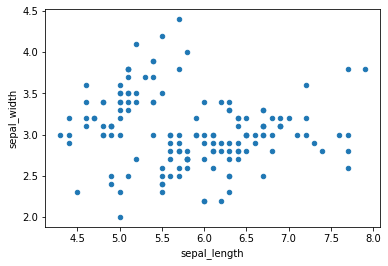

In [16]:
df.plot(kind="scatter", x="sepal_length", y="sepal_width")

/home/lucas/anaconda3/envs/via_varejo/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


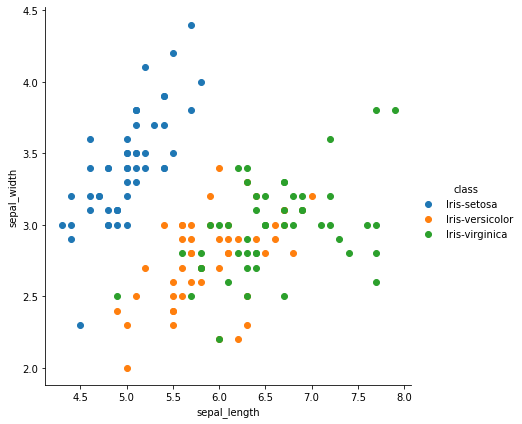

In [17]:
sns.FacetGrid(df, hue="class", size=6).map(plt.scatter, "sepal_length", "sepal_width").add_legend()

/home/lucas/anaconda3/envs/via_varejo/lib/python3.6/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


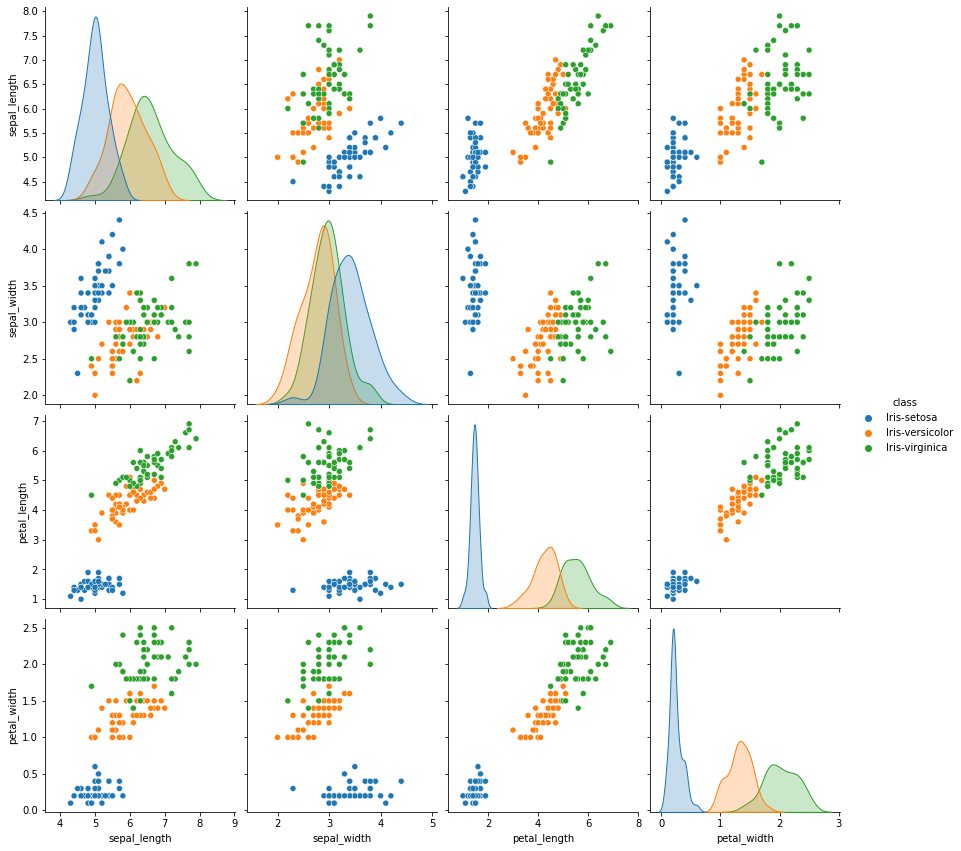

In [18]:
sns.pairplot(df, hue="class", size=3)

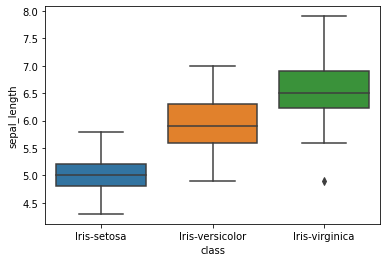

In [41]:
sns.boxplot(x="class", y="sepal_length", data=df)

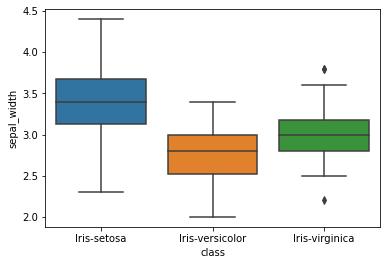

In [42]:
sns.boxplot(x="class", y="sepal_width", data=df)

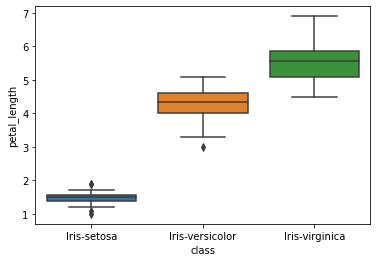

In [43]:
sns.boxplot(x="class", y="petal_length", data=df)

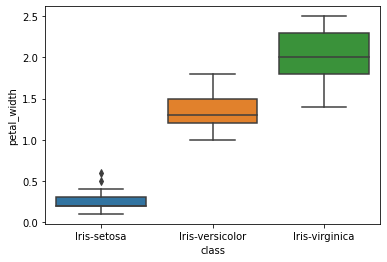

In [44]:
sns.boxplot(x="class", y="petal_width", data=df)

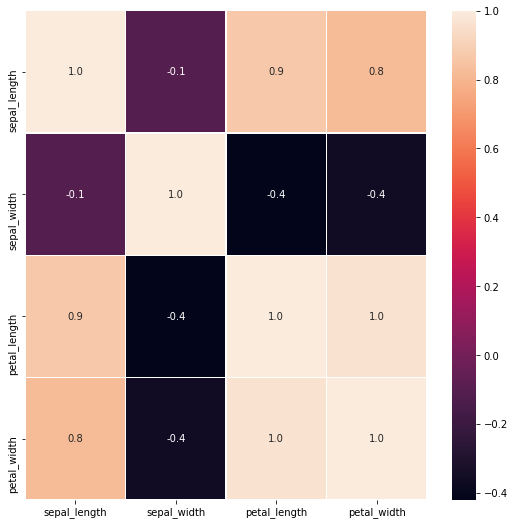

In [45]:
# Verificando a correlação dos dados
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
# Verificando as informações estatísticas
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **3. Pré-processamento dos Dados**

**Verificando se existem dados nulos ou ausentes**

In [19]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [20]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [21]:
X = df.drop(columns=['class'])
y = df[['class']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

There are 120 samples in the training set and 30 samples in the test set



In [23]:
# Normalização dos dados
scaler = StandardScaler()

scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

print(X_train_norm[:5])
print('\n')
print(X_test_norm[:5])

[[-1.47393679  1.22037928 -1.5639872  -1.30948358]
 [-0.13307079  3.02001693 -1.27728011 -1.04292204]
 [ 1.08589829  0.09560575  0.38562104  0.28988568]
 [-1.23014297  0.77046987 -1.21993869 -1.30948358]
 [-1.7177306   0.32056046 -1.39196294 -1.30948358]]


[[ 0.35451684 -0.57925837  0.5576453   0.02332414]
 [-0.13307079  1.67028869 -1.16259727 -1.17620281]
 [ 2.30486738 -1.02916778  1.81915651  1.48941263]
 [ 0.23261993 -0.35430366  0.44296246  0.42316645]
 [ 1.2077952  -0.57925837  0.61498672  0.28988568]]


## **4. Treinamento dos Modelos**

#### **SVM - Support Vector Machine**

In [70]:
svc = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svc.fit(X_train_norm, y_train)

print('The accuracy of the svc classifier on training data is {:.2f} out of 1'.format(svm.score(X_train_norm, y_train)))

print('The accuracy of the svc classifier on test data is {:.2f} out of 1'.format(svm.score(X_test_norm, y_test)))

The accuracy of the svm classifier on training data is 0.97 out of 1
The accuracy of the svm classifier on test data is 1.00 out of 1


/home/lucas/anaconda3/envs/via_varejo/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### **KNN (K-Nearest Neighbors)**

In [71]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_norm, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train_norm, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test_norm, y_test)))

The accuracy of the knn classifier is 0.96 out of 1 on training data
The accuracy of the knn classifier is 1.00 out of 1 on test data


/home/lucas/anaconda3/envs/via_varejo/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### **Xgboost**

In [74]:
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train_norm, y_train)

print('The accuracy of the xgb classifier is {:.2f} out of 1 on training data'.format(xgb_clf.score(X_train_norm, y_train)))
print('The accuracy of the xgb classifier is {:.2f} out of 1 on test data'.format(xgb_clf.score(X_test_norm, y_test)))

[19:45:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of the xgb classifier is 1.00 out of 1 on training data
The accuracy of the xgb classifier is 1.00 out of 1 on test data


/home/lucas/anaconda3/envs/via_varejo/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/lucas/anaconda3/envs/via_varejo/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/lucas/anaconda3/envs/via_varejo/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory con

## **5. Salvando o melhor modelo**

In [119]:
filename = './weights/best_model_weights.sav'
pickle.dump(knn, open(filename, 'wb'))